### Задача 6.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

In [2]:
#загружаем данные
lambda_ = 1. / 88
t_0 = 300
t = 90000

data = np.loadtxt('6.csv', delimiter=',', skiprows=3)

$ E(N_t|N_s) = \text{/ линейность /} = E(N_t-N_s|N_s) + E(N_s|N_s) = \text{/ $(N_t-N_s)$ и $N_s$ независимы /} = E(N_t-N_s) + N_s = \text{/ $N_t-N_s \sim Pois(\lambda(t - s)$ /} = \lambda(t - s) + N_s $

In [3]:
operation_amount = t // t_0
refined_prediction = np.zeros(operation_amount) #предсказанные значения
refined_prediction[0] = lambda_ * t
num_of_broken = np.zeros(operation_amount) #количеcтво сломанных серверов к моменту time[i]
time = np.zeros(operation_amount) #время с шагом t_0

for i in range(1, operation_amount):
    time[i] = t_0 + time[i - 1]
    num_of_broken[i] = np.shape(np.where(data <= time[i]))[1]
    refined_prediction[i] = lambda_ * (t - time[i]) + num_of_broken[i]

In [6]:
for i in range(operation_amount):
    print (time[i], ': ', refined_prediction[i])

0.0 :  1022.72727273
300.0 :  1021.31818182
600.0 :  1020.90909091
900.0 :  1023.5
1200.0 :  1020.09090909
1500.0 :  1018.68181818
1800.0 :  1018.27272727
2100.0 :  1018.86363636
2400.0 :  1019.45454545
2700.0 :  1021.04545455
3000.0 :  1020.63636364
3300.0 :  1019.22727273
3600.0 :  1018.81818182
3900.0 :  1019.40909091
4200.0 :  1020.0
4500.0 :  1020.59090909
4800.0 :  1017.18181818
5100.0 :  1016.77272727
5400.0 :  1015.36363636
5700.0 :  1015.95454545
6000.0 :  1018.54545455
6300.0 :  1018.13636364
6600.0 :  1018.72727273
6900.0 :  1018.31818182
7200.0 :  1016.90909091
7500.0 :  1018.5
7800.0 :  1019.09090909
8100.0 :  1017.68181818
8400.0 :  1016.27272727
8700.0 :  1013.86363636
9000.0 :  1015.45454545
9300.0 :  1019.04545455
9600.0 :  1021.63636364
9900.0 :  1020.22727273
10200.0 :  1022.81818182
10500.0 :  1021.40909091
10800.0 :  1023.0
11100.0 :  1022.59090909
11400.0 :  1023.18181818
11700.0 :  1021.77272727
12000.0 :  1018.36363636
12300.0 :  1019.95454545
12600.0 :  1018.54

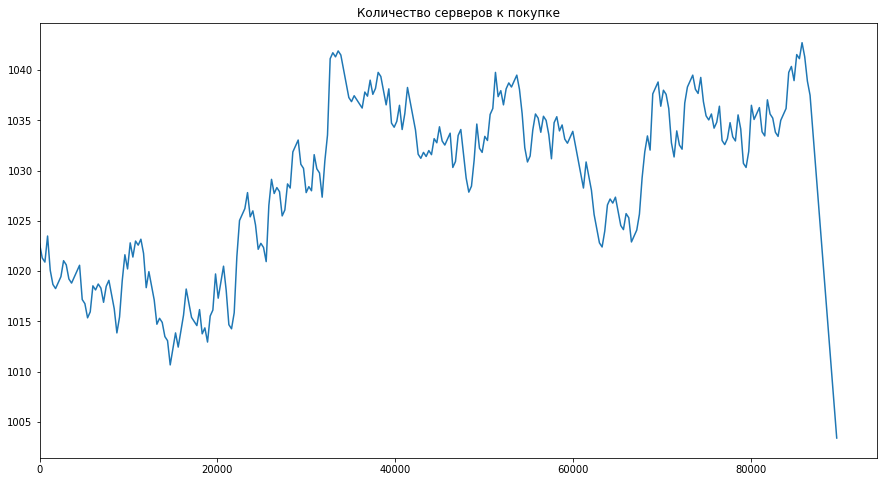

In [5]:
plt.figure(figsize=(15, 8))
plt.title('Количество серверов к покупке')
plt.plot(time, refined_prediction)
plt.xlim(xmin=0)
#plt.ylim(ymin=1000)
plt.show()